#MSPA PREDICT 411

##Bonus Problem: Chapter 6

In [1]:
#!pip install sas7bdat

import numpy as np
import pandas as pd
import statsmodels.api as sm

from patsy import dmatrices
from sas7bdat import SAS7BDAT

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

sns.set_style('darkgrid')
%matplotlib inline

###Introduction

This document presents the results of third set of bonus problems for the Masters of Science in Predictive Analytics course: PREDICT 411. This assessment required the student to work through the problem set of Chapters 6 of Hoffmann (2004), Generalized Linear Models, An Applied Approach.

###Question 1

####Loading the Data

In [2]:
with SAS7BDAT('data/stress.sas7bdat') as f:
    df_stress = f.to_data_frame()

In [3]:
df_stress.head(5)

,AGE,COHES,ESTEEM,GRADES,SATTACH,STRESS,NEWID
0,11,61.256001,32,15,21,0,5
1,14,49.000000,33,17,22,0,6
2,14,35.000000,27,15,28,0,10
3,11,74.000000,34,14,33,0,15
4,14,58.000000,29,15,28,0,16


####Part A

Estimate a histogram and summary statistics for the variable stress. What do you think is its most likely probability distribution?

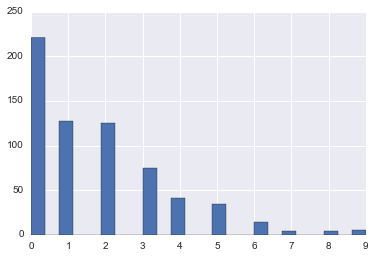

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df_stress['STRESS'], 24)
plt.show()

Seems to have a shape similar to that of a Beta Negative Binomial distribution. Is non-continuous in nature.

In [5]:
print('mean:', round(df_stress['STRESS'].mean(), 2))

mean: 1.73


In [6]:
import numpy as np

print('variance:', round(np.var(df_stress['STRESS']), 2))

variance: 3.41


The variance is greater than the mean.

####Part B

Plot a normal probability (Q-Q) plot of the variable stress. Comment about its departure from a normal distribution.

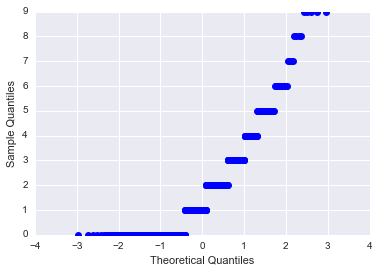

In [7]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

#fig = sm.qqplot(df_stress['STRESS'], line='45')
fig = sm.qqplot(df_stress['STRESS'])
plt.show()

Has a fat negative tail.

###Question 2

####Part A

Interpret the coefficients (from the Poisson and negative binomial models) associated with the variables cohes and sattach using the percent change formula we have seen in this and earlier chapters.

In [62]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model_poi = smf.glm('STRESS ~ COHES + ESTEEM + GRADES + SATTACH', 
                    data=df_stress, 
                    family=sm.families.Poisson(link=sm.families.links.log)).fit()

model_poi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 STRESS   No. Observations:                  651
Model:                            GLM   Df Residuals:                      646
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1203.6
Date:                Mon, 15 Aug 2016   Deviance:                       1245.4
Time:                        09:44:34   Pearson chi2:                 1.15e+03
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.7345      0.234     11.683      0.000         2.276     3.193
COHES         -0.0129      0.003     -4.466      0.000        -0.019    -0.007
ESTEEM        -0.0237      0.008     -2.947      0.003        -0.039    -0.008
GRADES        -0.0235      0.010     -2.379      0.017        -0.043    -0.004
SATTACH       -0.0165      0.006     -2.850      0.004        -0.028    -0.005
==============================================================================
"""

In [63]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model_nb = smf.glm('STRESS ~ COHES + ESTEEM + GRADES + SATTACH', 
                   data=df_stress, 
                   family=sm.families.NegativeBinomial()).fit()

model_nb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 STRESS   No. Observations:                  651
Model:                            GLM   Df Residuals:                      646
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                  0.664952252883
Method:                          IRLS   Log-Likelihood:                -1148.4
Date:                Mon, 15 Aug 2016   Deviance:                       576.00
Time:                        09:44:37   Pearson chi2:                     430.
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.7623      0.334      8.272      0.000         2.108     3.417
COHES         -0.0135      0.004     -3.340      0.001        -0.021    -0.006
ESTEEM        -0.0229      0.011     -2.047      0.041        -0.045    -0.001
GRADES        -0.0244      0.014     -1.795      0.073        -0.051     0.002
SATTACH       -0.0169      0.008     -2.088      0.037        -0.033    -0.001
==============================================================================
"""

####Part B

Based on both the Poisson and negative binomial regression models, compute the predicted count of stress for those whose levels of family cohesion are less than one standard deviation below the mean (low), between one standard deviation below and one standard deviation above the mean (medium), and more than one standard deviation above the mean (high).

In [36]:
import numpy as np

mean = df_stress['COHES'].mean()
std = np.std(df_stress['COHES'])

lq = mean - std
uq = mean + std

In [43]:
df_stress['STRESS_pred'] = model_poi.predict()

print('Poisson:')
print('low:', df_stress[df_stress['COHES'] < lq]['STRESS_pred'].sum())
print('medium:', df_stress[(df_stress['COHES'] >= lq) & (df_stress['COHES'] <= uq)]['STRESS_pred'].sum())
print('high:', df_stress[df_stress['COHES'] > uq]['STRESS_pred'].sum())

Poisson:
low: 265.2951611150819
medium: 743.0657502689479
high: 117.63908861596572


In [44]:
df_stress['STRESS_pred'] = model_nb.predict()

print('Negative Binomial:')
print('low:', df_stress[df_stress['COHES'] < lq]['STRESS_pred'].sum())
print('medium:', df_stress[(df_stress['COHES'] >= lq) & (df_stress['COHES'] <= uq)]['STRESS_pred'].sum())
print('high:', df_stress[df_stress['COHES'] > uq]['STRESS_pred'].sum())

Negative Binomial:
low: 268.0616134173716
medium: 742.4349950455183
high: 116.48048023141301


####Part C

What is the expected percent difference in the number of stressful life events for those at high and low levels of family cohesion in each model?

In [56]:
df_stress['STRESS_pred'] = model_poi.predict()

low = df_stress[df_stress['COHES'] < lq]['STRESS_pred'].sum()
high = df_stress[df_stress['COHES'] > uq]['STRESS_pred'].sum()

print('Poisson:')
print('STRESS for low COHES is', round(low / high, 2), 'times higher than high COHES')

Poisson:
STRESS for low COHES is 2.26 times higher than high COHES


In [55]:
df_stress['STRESS_pred'] = model_nb.predict()

low = df_stress[df_stress['COHES'] < lq]['STRESS_pred'].sum()
high = df_stress[df_stress['COHES'] > uq]['STRESS_pred'].sum()

print('Negative Binomial:')
print('STRESS for low COHES is', round(low / high, 2), 'times higher than high COHES')

Negative Binomial:
STRESS for low COHES is 2.3 times higher than high COHES


###Question 3

Compute the AICs and  BICs from the Poisson, the overdispersed Poisson, and the negative binomial regression models estimated in exercise 2. Discuss which model you prefer and why.

In [64]:
model_poi.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            2417.2190 
Link Function:      log              BIC:            -2939.6906
Dependent Variable: STRESS           Log-Likelihood: -1203.6   
Date:               2016-08-15 09:44 LL-Null:        -1255.8   
No. Observations:   651              Deviance:       1245.4    
Df Model:           4                Pearson chi2:   1.15e+03  
Df Residuals:       646              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept    2.7345    0.2341  11.6826  0.0000   2.2758   3.1933
COHES       -0.0129    0.0029  -4.4656  0.0000  -0.0186  -0.0072
ESTEEM      -0.0237    0.0080  -2.9472  0.0032  -0.0394  -0.0079
GRADES      -0.0235    0.0099  -2.3791  0.0174  -0.0428  -0.0041
SATTACH     -0.0165    0.0058  -2.8501  0.0044  -0.0278  -0.0051
===============================================================

"""

In [66]:
#model_nb.summary2()
#no easy way to get AIC/BIC for nb using statsmodel at the moment

###Question 4

Using the Poisson regression model estimated in exercise 2, plot the deviance residuals by the predicted values. Discuss what this plot indicates about the regression model.